In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
X = df.iloc[:,[1,2]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(150, 2) (150,)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#Split the Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [14]:
from sklearn.svm import SVC

In [29]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print(model.score(X_test, y_test))

0.9333333333333333


In [30]:
from sklearn.metrics import plot_confusion_matrix, classification_report

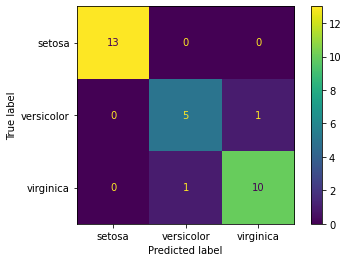

In [31]:
plot_confusion_matrix(model, X_test, y_test);

In [32]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.83      0.83      0.83         6
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



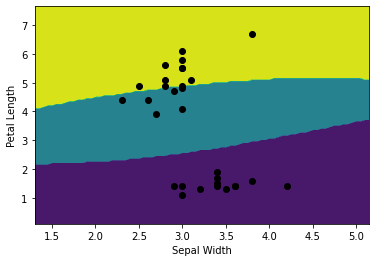

In [33]:
# check the test data boundaries
f1 = np.arange(X_test[:,0].min()-1, X_test[:,0].max()+1, 0.05)
f2  = np.arange(X_test[:,1].min()-1, X_test[:,1].max()+1, 0.05)
F1 , F2  = np.meshgrid(f1,f2)
predictions = model.predict(np.c_[F1.ravel(), F2.ravel()])
predictions = np.where(predictions=='setosa',0,predictions)
predictions = np.where(predictions=='versicolor',1,predictions)
predictions = np.where(predictions=='virginica',2,predictions)
Z = predictions.reshape(F1.shape)
plt.contourf(F1,F2,Z, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], c = 'k')
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.show()